# Text Mining

### Quais são as principais criticas apresentadas?

Depois de analisar os sentimento que uma dada review transmite, importa agora aplicar tecnicas de tet mining de modo a identificar os tópicos mais críticados de cada vendedo

In [1]:
import pandas as pd 

data =  pd.read_csv('AmozonReviews_clean.csv')

In [2]:
import nltk
from nltk import FreqDist

1) Preparar os dados 

In [3]:
# Função que faz lematização, tokenização, retira pontuação e stop words, coloca o texto em minusculas

def dataPrep(review):
    
    doc = nlp(review)  
    
    res = " ".join([token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct])   
    return res

In [4]:
#!pip install -U spacy
import spacy
nlp = spacy.load('en_core_web_md')

In [5]:
#data["review_clean"] = data["Text"].apply(lambda x: dataPrep(x))

In [6]:
## Carregar dataset
#data.to_csv('AmozonReviews_clean.csv')


In [7]:
data

,Unnamed: 0,Unnamed: 0.1,Id,ProductId,UserId,Score,Summary,Text,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation,review_clean
0,0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000000,0.071429,0.0,0.214286,0.071429,0.214286,0.071429,0.000000,0.071429,0.214286,0.071429,buy vitality can dog food product find good qu...
1,1,1,2,B00813GRG4,A1D87F6ZCVE5NK,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.000000,0.000000,0.0,0.333333,0.000000,0.000000,0.333333,0.166667,0.000000,0.000000,0.166667,product arrive label jumbo salted peanuts pean...
2,2,2,3,B000LQOCH0,ABXLMWJIXXAIN,4,"""Delight"" says it all",This is a confection that has been around a fe...,0.139535,0.093023,0.0,0.116279,0.046512,0.162791,0.139535,0.069767,0.139535,0.046512,0.046512,confection century light pillowy citrus gela...
3,3,3,4,B000UA0QIQ,A395BORC6FGVXV,2,Cough Medicine,If you are looking for the secret ingredient i...,0.000000,0.000000,0.0,0.222222,0.111111,0.333333,0.000000,0.000000,0.000000,0.222222,0.111111,look secret ingredient robitussin believe find...
4,4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,5,Great taffy,Great taffy at a great price. There was a wid...,0.000000,0.000000,0.0,0.181818,0.090909,0.272727,0.000000,0.000000,0.000000,0.181818,0.272727,great taffy great price wide assortment yumm...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,19995,19996,B002C50X1M,A1XRXZI5KOMVDD,4,Crispy and tart,Deep River Salt & Vinegar chips are thick and ...,0.000000,0.000000,0.0,0.272727,0.000000,0.272727,0.090909,0.000000,0.000000,0.181818,0.181818,deep river salt vinegar chip thick crunchy t...
19996,19996,19996,19997,B002C50X1M,A7G9M0IE7LABX,5,Exceeded my expectations. One of the best chip...,I was very skeptical about buying a brand of c...,0.000000,0.000000,0.0,0.090909,0.090909,0.181818,0.181818,0.090909,0.000000,0.181818,0.181818,skeptical buy brand chip taste buy bulk.<br />...
19997,19997,19997,19998,B002C50X1M,A38J5PRUDESMZF,5,"Awesome Goodness! (deep river kettle chips, sw...",Before you turn to other name brands out there...,0.000000,0.000000,0.0,0.166667,0.166667,0.166667,0.000000,0.000000,0.000000,0.166667,0.333333,turn brand try maui onion bit salty time crunc...
19998,19998,19998,19999,B002C50X1M,A17TPOSAG43GSM,3,"Pretty good, but prefer other jalapeno chips","I was expecting some ""serious flavor"" as it wa...",0.000000,0.000000,0.0,0.272727,0.090909,0.318182,0.090909,0.000000,0.000000,0.090909,0.136364,expect flavor advertise bag compare jalapeno c...


In [8]:
!pip install wordcloud

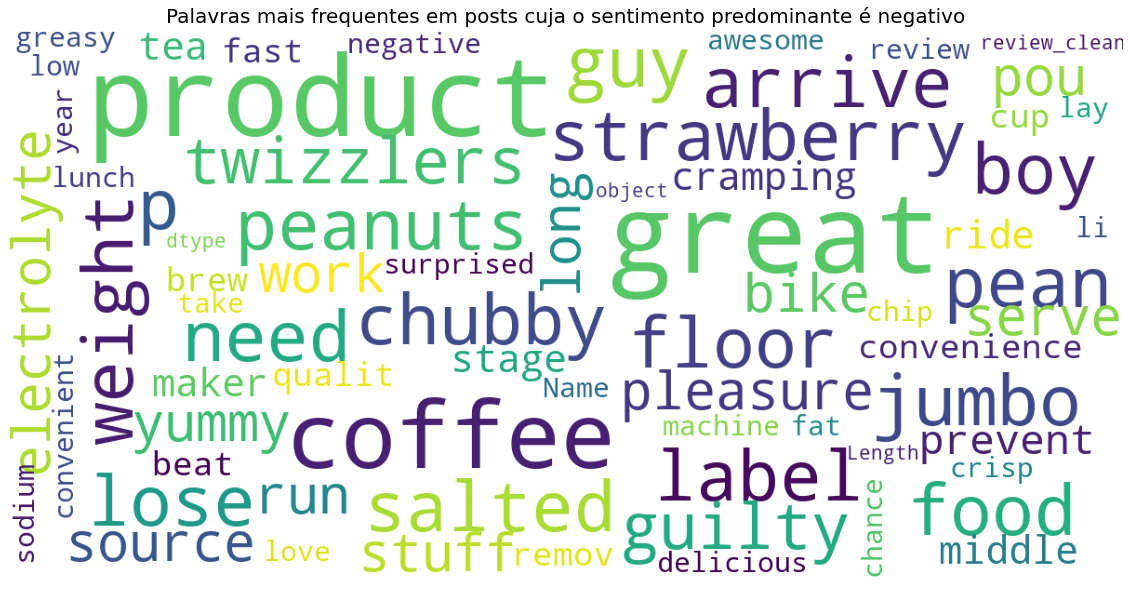

In [9]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.title('Palavras mais frequentes em posts cuja o sentimento predominante é negativo',fontsize=20)
    plt.show()
    
# print wordcloud
show_wordcloud(data[data.negative > data.positive].review_clean)

In [10]:
print(data.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Id', 'ProductId', 'UserId', 'Score',
       'Summary', 'Text', 'fear', 'anger', 'anticip', 'trust', 'surprise',
       'positive', 'negative', 'sadness', 'disgust', 'joy', 'anticipation',
       'review_clean'],
      dtype='object')


In [11]:
print(data.Score)

0        5
1        1
2        4
3        2
4        5
        ..
19995    4
19996    5
19997    5
19998    3
19999    5
Name: Score, Length: 20000, dtype: int64


## Topic Modeling 

Vamos analisar os dados que temos 

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

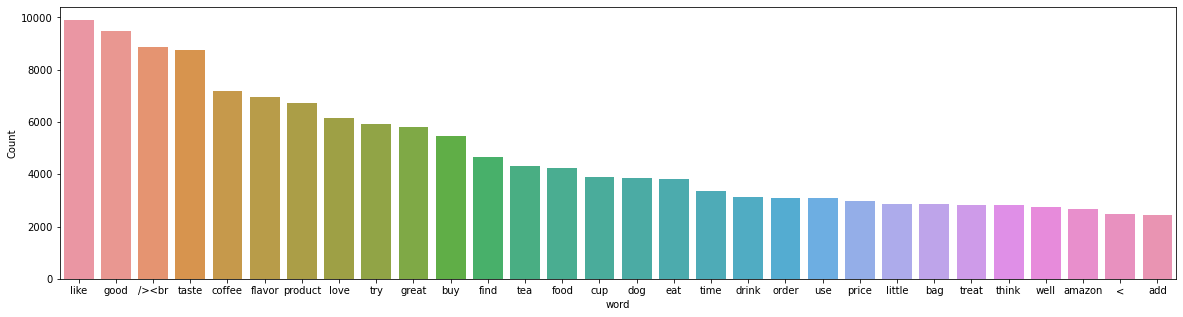

In [14]:
# 1) Analizar a frequencia de palavras

freq_words(data['review_clean'] )

In [15]:
pip install -U gensim

Note: you may need to restart the kernel to use updated packages.


###  MODELO LDA

Estes modelo permite modelar relações entre tópicos.
https://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf

In [19]:
# 1) criar o modelo LDA
import gensim
from gensim import corpora

reviews_2 = data['review_clean'] 

l = []
    
# colocar as reviews numa lista
for r in reviews_2:
    l.append (r.split())
    
    
# Criar dicionário do nosso corpus, onde cada termo passa a ser represetado por um indice
dictionary = corpora.Dictionary(l)

# Criar uma matrix usando os indices do dicionario
doc_term_matrix = [dictionary.doc2bow(rev) for rev in l]

# criar uma instancia do modelo LDA
LDA = gensim.models.ldamodel.LdaModel

# criar modelo
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,
                chunksize=1000, passes=50)


In [20]:
lda_model.print_topics()

[(0,
  '0.027*"green" + 0.024*"mountain" + 0.022*"carbonate" + 0.018*"blend" + 0.018*"beverage" + 0.015*"drinker" + 0.012*"roasted" + 0.011*"lid" + 0.011*"puck" + 0.011*"cups"'),
 (1,
  '0.020*"buy" + 0.018*"product" + 0.016*"order" + 0.015*"price" + 0.015*"amazon" + 0.013*"find" + 0.012*"store" + 0.012*"good" + 0.011*"great" + 0.010*"bag"'),
 (2,
  '0.132*"/><br" + 0.040*"<" + 0.031*"br" + 0.024*"/>i" + 0.018*"chip" + 0.016*">" + 0.014*"/>the" + 0.011*"product" + 0.011*"gp" + 0.011*"href="http://www.amazon.com"'),
 (3,
  '0.031*"dog" + 0.029*"food" + 0.022*"treat" + 0.019*"eat" + 0.018*"love" + 0.013*"like" + 0.009*"good" + 0.008*"old" + 0.007*"try" + 0.007*"year"'),
 (4,
  '0.027*"taste" + 0.023*"like" + 0.023*"good" + 0.015*"flavor" + 0.015*"chocolate" + 0.014*"mix" + 0.014*"try" + 0.014*"great" + 0.012*"peanut" + 0.011*"butter"'),
 (5,
  '0.108*"coffee" + 0.060*"cup" + 0.022*"flavor" + 0.021*"k" + 0.020*"like" + 0.020*"good" + 0.017*"taste" + 0.017*"strong" + 0.016*"blend" + 0.016*

In [23]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [24]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

/opt/conda/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.127206 -0.018144       1        1  24.828996
4      0.151505  0.011924       2        1  19.575603
3      0.121050 -0.036655       3        1  19.524250
6      0.095880 -0.018103       4        1  16.126484
5      0.111746  0.120609       5        1   9.009243
2     -0.257325 -0.298454       6        1   8.453644
0     -0.350063  0.238823       7        1   2.481780, topic_info=            Term         Freq        Total Category  logprob  loglift
148        /><br  9286.000000  9286.000000  Default  30.0000  30.0000
408       coffee  7028.000000  7028.000000  Default  29.0000  29.0000
525          cup  3898.000000  3898.000000  Default  28.0000  28.0000
982          tea  4929.000000  4929.000000  Default  27.0000  27.0000
3            dog  4436.000000  4436.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
729        aroma   155.776188   406.587496   Topic7  -4.7494   2.7368
1489        mild   141.098216   339.359143   Topic7  -4.8483   2.8186
1537          24   117.646295   265.606366   Topic7  -5.0301   2.8819
751   aftertaste    90.151538   355.999683   Topic7  -5.2963   2.3228
1081         bed    78.364943   165.483549   Topic7  -5.4364   2.9487

[412 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
557       1  0.999173      $
148       4  0.130077  /><br
148       6  0.869833  /><br
1639      6  0.992745  />and
1019      6  0.992564  />for
...     ...       ...    ...
229       1  0.388336   year
229       2  0.047100   year
229       3  0.474366   year
229       4  0.051906   year
229       5  0.038449   year

[619 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 4, 7, 6, 3, 1])